In [1]:
# !pip install pyreadr
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn
# !pip install xgboost

In [2]:
import pyreadr
import pandas as pd

# Specify the path to your .RData file
rdata_file_faulty_training = "Data/Output/TEP_Faulty_Training.RData"
rdata_file_faulty_testing = "Data/Output/TEP_Faulty_Testing.RData"
rdata_file_fault_free_testing ="Data/Output/TEP_FaultFree_Testing.RData"
rdata_file_fault_free_training ="Data/Output/TEP_FaultFree_Training.RData"

# Load the .RData file
faulty_training_result = pyreadr.read_r(rdata_file_faulty_training)
faulty_testing_result = pyreadr.read_r(rdata_file_faulty_testing)
fault_free_testing_result = pyreadr.read_r(rdata_file_fault_free_testing)
fault_free_training_result = pyreadr.read_r(rdata_file_fault_free_training)

df_faulty_training = faulty_training_result['faulty_training']
df_faulty_testing = faulty_testing_result['faulty_testing']
df_fault_free_testing = fault_free_testing_result['fault_free_testing']
df_fault_free_training = fault_free_training_result['fault_free_training']

In [3]:
df_faulty_training.describe()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,...,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,1.050000e+01,2.505000e+02,2.505000e+02,2.613588e-01,3.663777e+03,4.506046e+03,9.370345e+00,2.690156e+01,4.236419e+01,2.723005e+03,...,5.431755e+01,3.043177e+01,6.324830e+01,2.295485e+01,3.992297e+01,3.807265e+01,4.643742e+01,5.060598e+01,4.194845e+01,1.884376e+01
std,5.766282e+00,1.443373e+02,1.443373e+02,1.495384e-01,4.316941e+01,1.110368e+02,3.646151e-01,2.320034e-01,3.172128e-01,7.599384e+01,...,5.258092e+00,2.048365e+01,7.400080e+00,1.108258e+01,1.293348e+01,2.949138e+00,2.358468e+00,1.759840e+01,1.001227e+01,5.176705e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,-4.735000e-03,3.327400e+03,3.540700e+03,6.639900e+00,2.538600e+01,3.965600e+01,2.413800e+03,...,3.118400e+01,-2.718600e-01,-4.893100e-03,-9.941000e-02,0.000000e+00,2.280100e+01,3.492300e+01,-3.635500e-01,-2.809500e-01,-5.327000e-03
25%,5.750000e+00,1.257500e+02,1.257500e+02,2.183000e-01,3.636500e+03,4.469000e+03,9.264200e+00,2.676000e+01,4.218100e+01,2.697600e+03,...,5.349700e+01,2.228000e+01,6.031400e+01,2.142300e+01,3.831300e+01,3.604900e+01,4.487800e+01,4.547900e+01,4.057500e+01,1.714300e+01
50%,1.050000e+01,2.505000e+02,2.505000e+02,2.511300e-01,3.663300e+03,4.508500e+03,9.355200e+00,2.690100e+01,4.234800e+01,2.705600e+03,...,5.397000e+01,2.521500e+01,6.149900e+01,2.212900e+01,3.996700e+01,3.815000e+01,4.633900e+01,4.806500e+01,4.120600e+01,1.829500e+01
75%,1.525000e+01,3.752500e+02,3.752500e+02,2.832100e-01,3.690200e+03,4.548000e+03,9.456800e+00,2.704300e+01,4.252400e+01,2.715000e+03,...,5.444300e+01,2.879700e+01,6.284100e+01,2.273800e+01,4.150700e+01,3.999100e+01,4.803100e+01,5.188700e+01,4.194900e+01,1.953700e+01
max,2.000000e+01,5.000000e+02,5.000000e+02,1.017500e+00,3.906700e+03,5.175800e+03,1.224000e+01,2.848600e+01,4.465300e+01,3.000500e+03,...,1.000000e+02,1.001900e+02,1.000200e+02,1.001100e+02,9.752800e+01,5.312100e+01,5.998000e+01,1.005200e+02,1.003200e+02,1.000100e+02


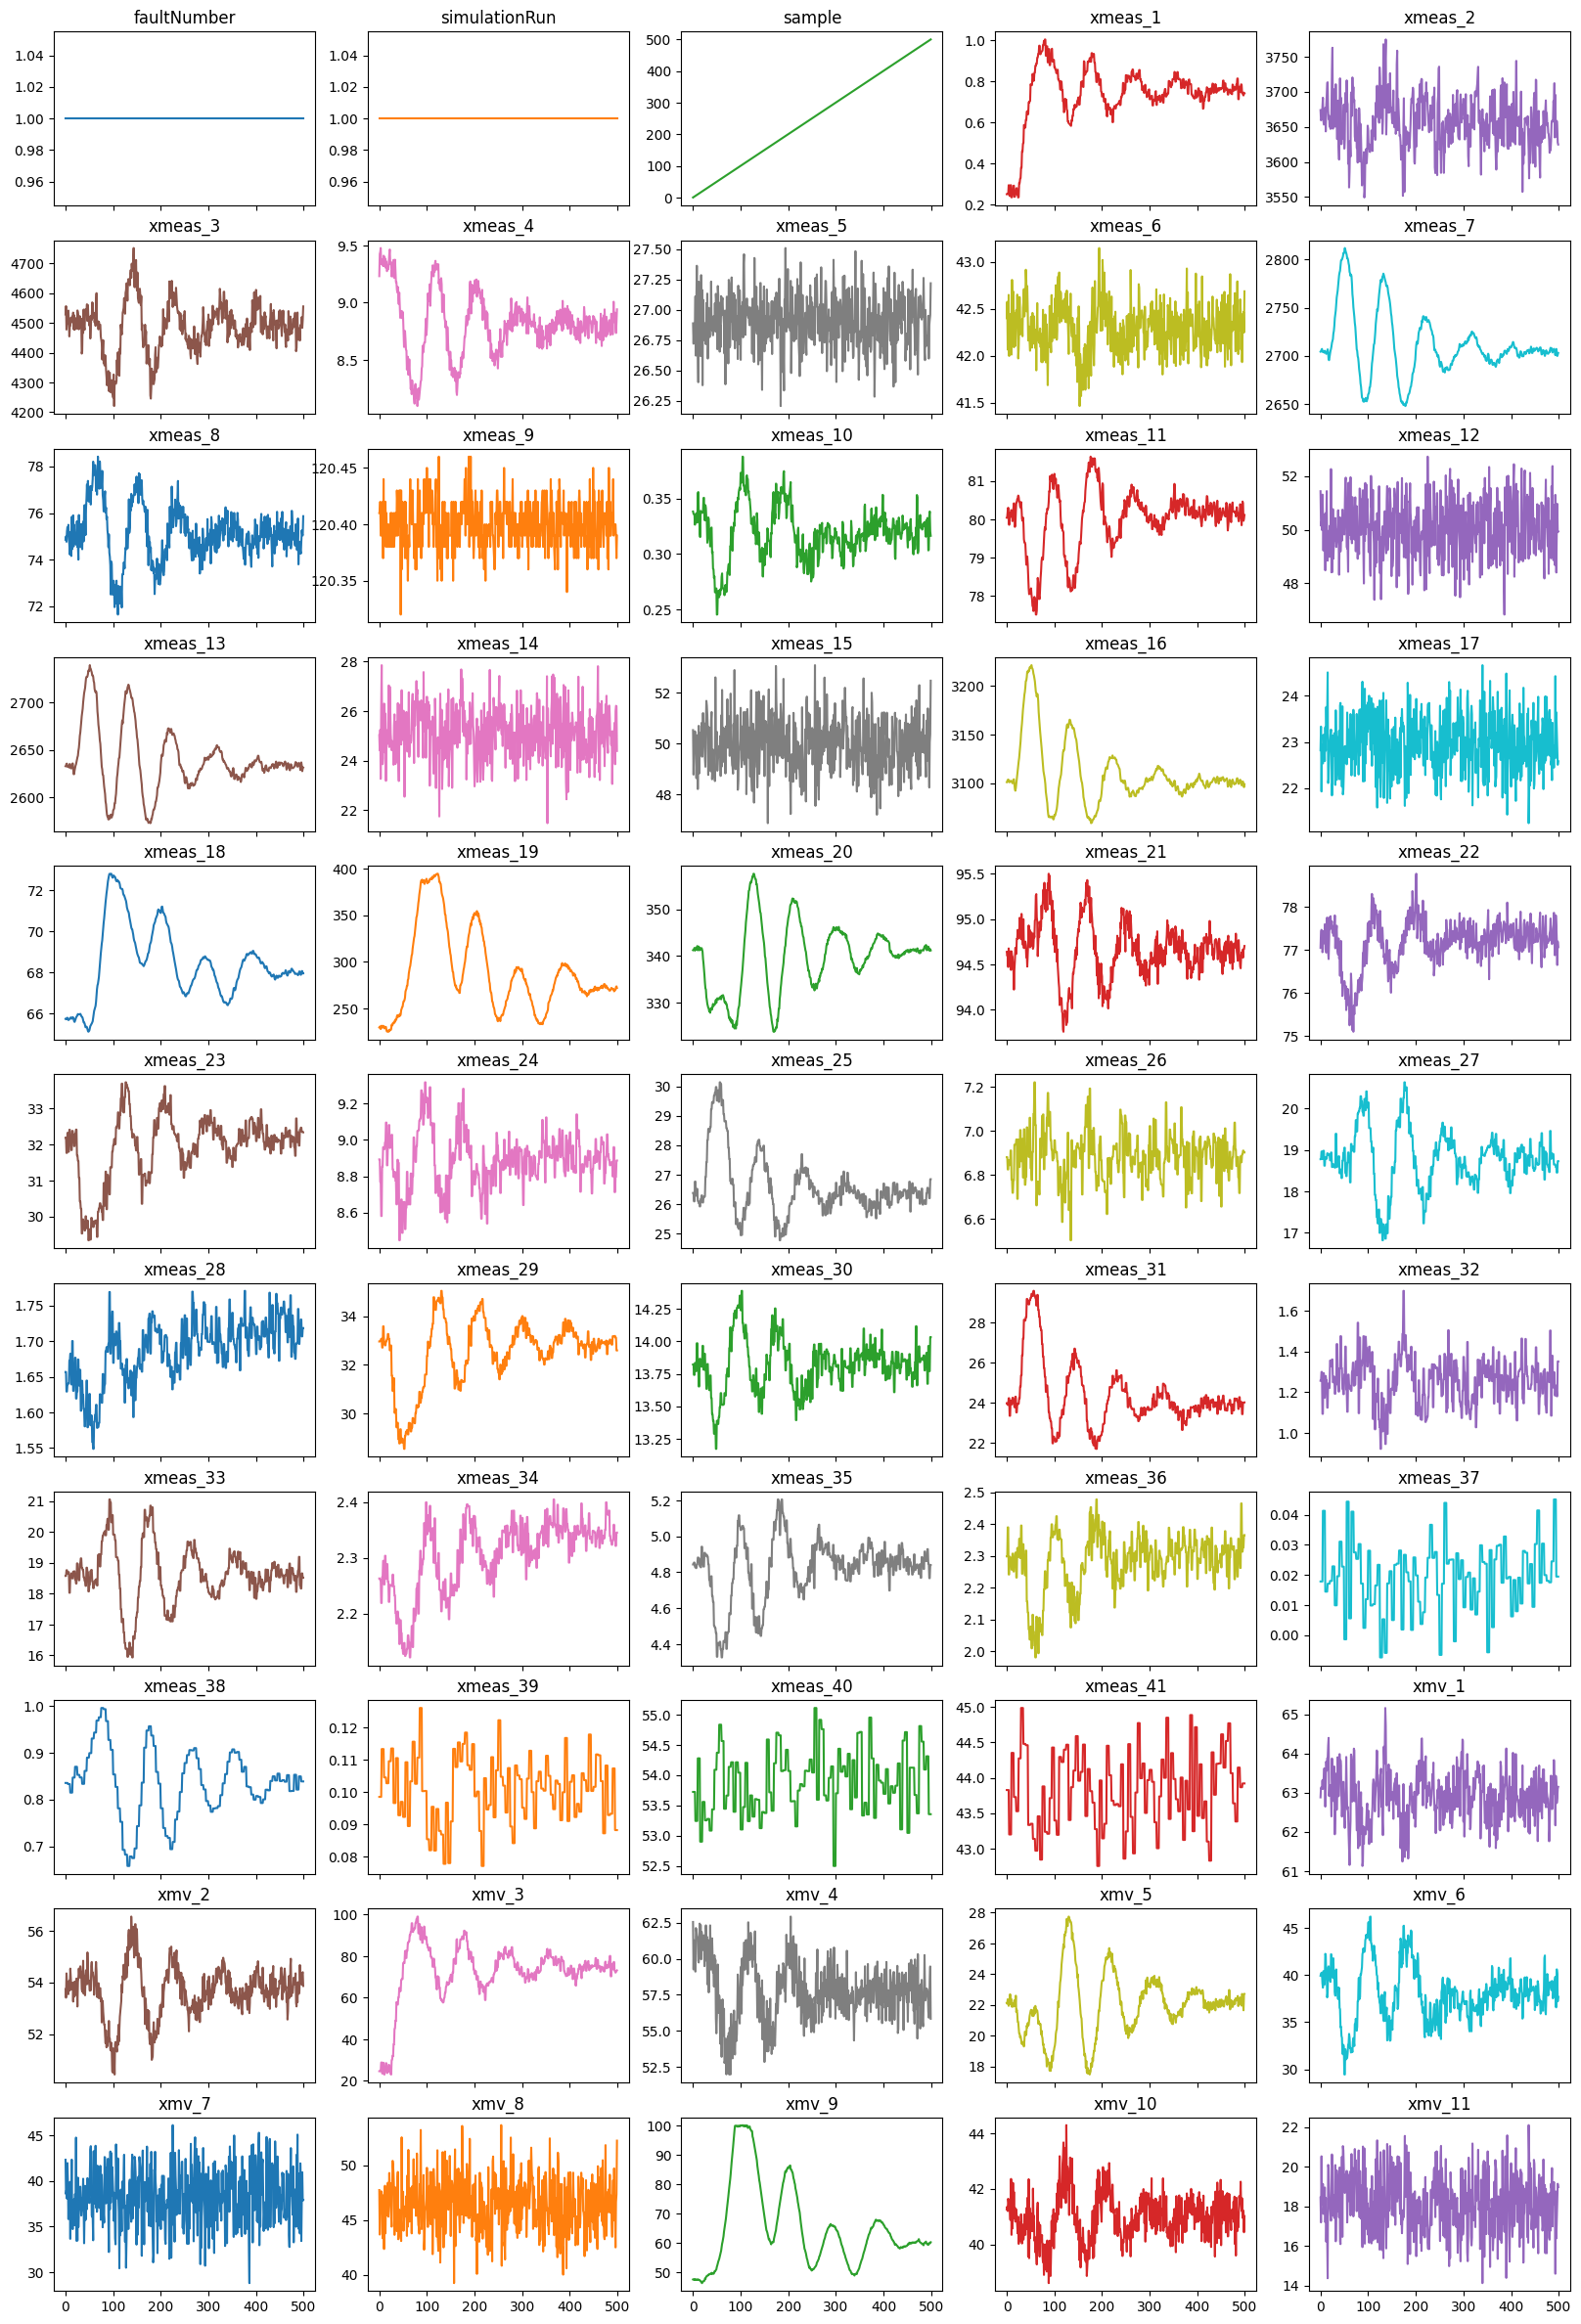

In [4]:
import matplotlib.pyplot as plt

# Plot time series for each variable for the first simulation
df_plot = df_faulty_training[(df_faulty_training['simulationRun']==1) & (df_faulty_training['faultNumber'] == 1)]
df_plot.plot(subplots=True, legend=False, layout=(11,5), figsize=(20,30), title=list(df_plot.columns))
plt.show()

In [5]:
import pandas as pd

df_training = pd.concat([df_fault_free_training, df_faulty_training], ignore_index=True)
df_testing = pd.concat([df_fault_free_testing, df_faulty_testing], ignore_index=True)
df_training

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249995,20.0,500.0,496,0.23419,3655.3,4461.7,9.3448,27.008,42.481,2703.0,...,53.670,23.350,61.061,20.719,40.999,38.653,47.386,47.528,40.212,17.659
5249996,20.0,500.0,497,0.26704,3647.4,4540.2,9.3546,27.034,42.671,2704.7,...,54.650,26.362,60.020,20.263,41.579,33.624,47.536,47.647,41.199,18.741
5249997,20.0,500.0,498,0.26543,3630.3,4571.6,9.4089,27.129,42.470,2705.1,...,54.274,26.521,59.824,20.189,41.505,40.967,52.437,47.802,41.302,23.199
5249998,20.0,500.0,499,0.27671,3655.7,4498.9,9.3781,27.353,42.281,2705.8,...,53.506,26.781,62.818,20.453,40.208,40.957,47.628,48.086,40.510,15.932


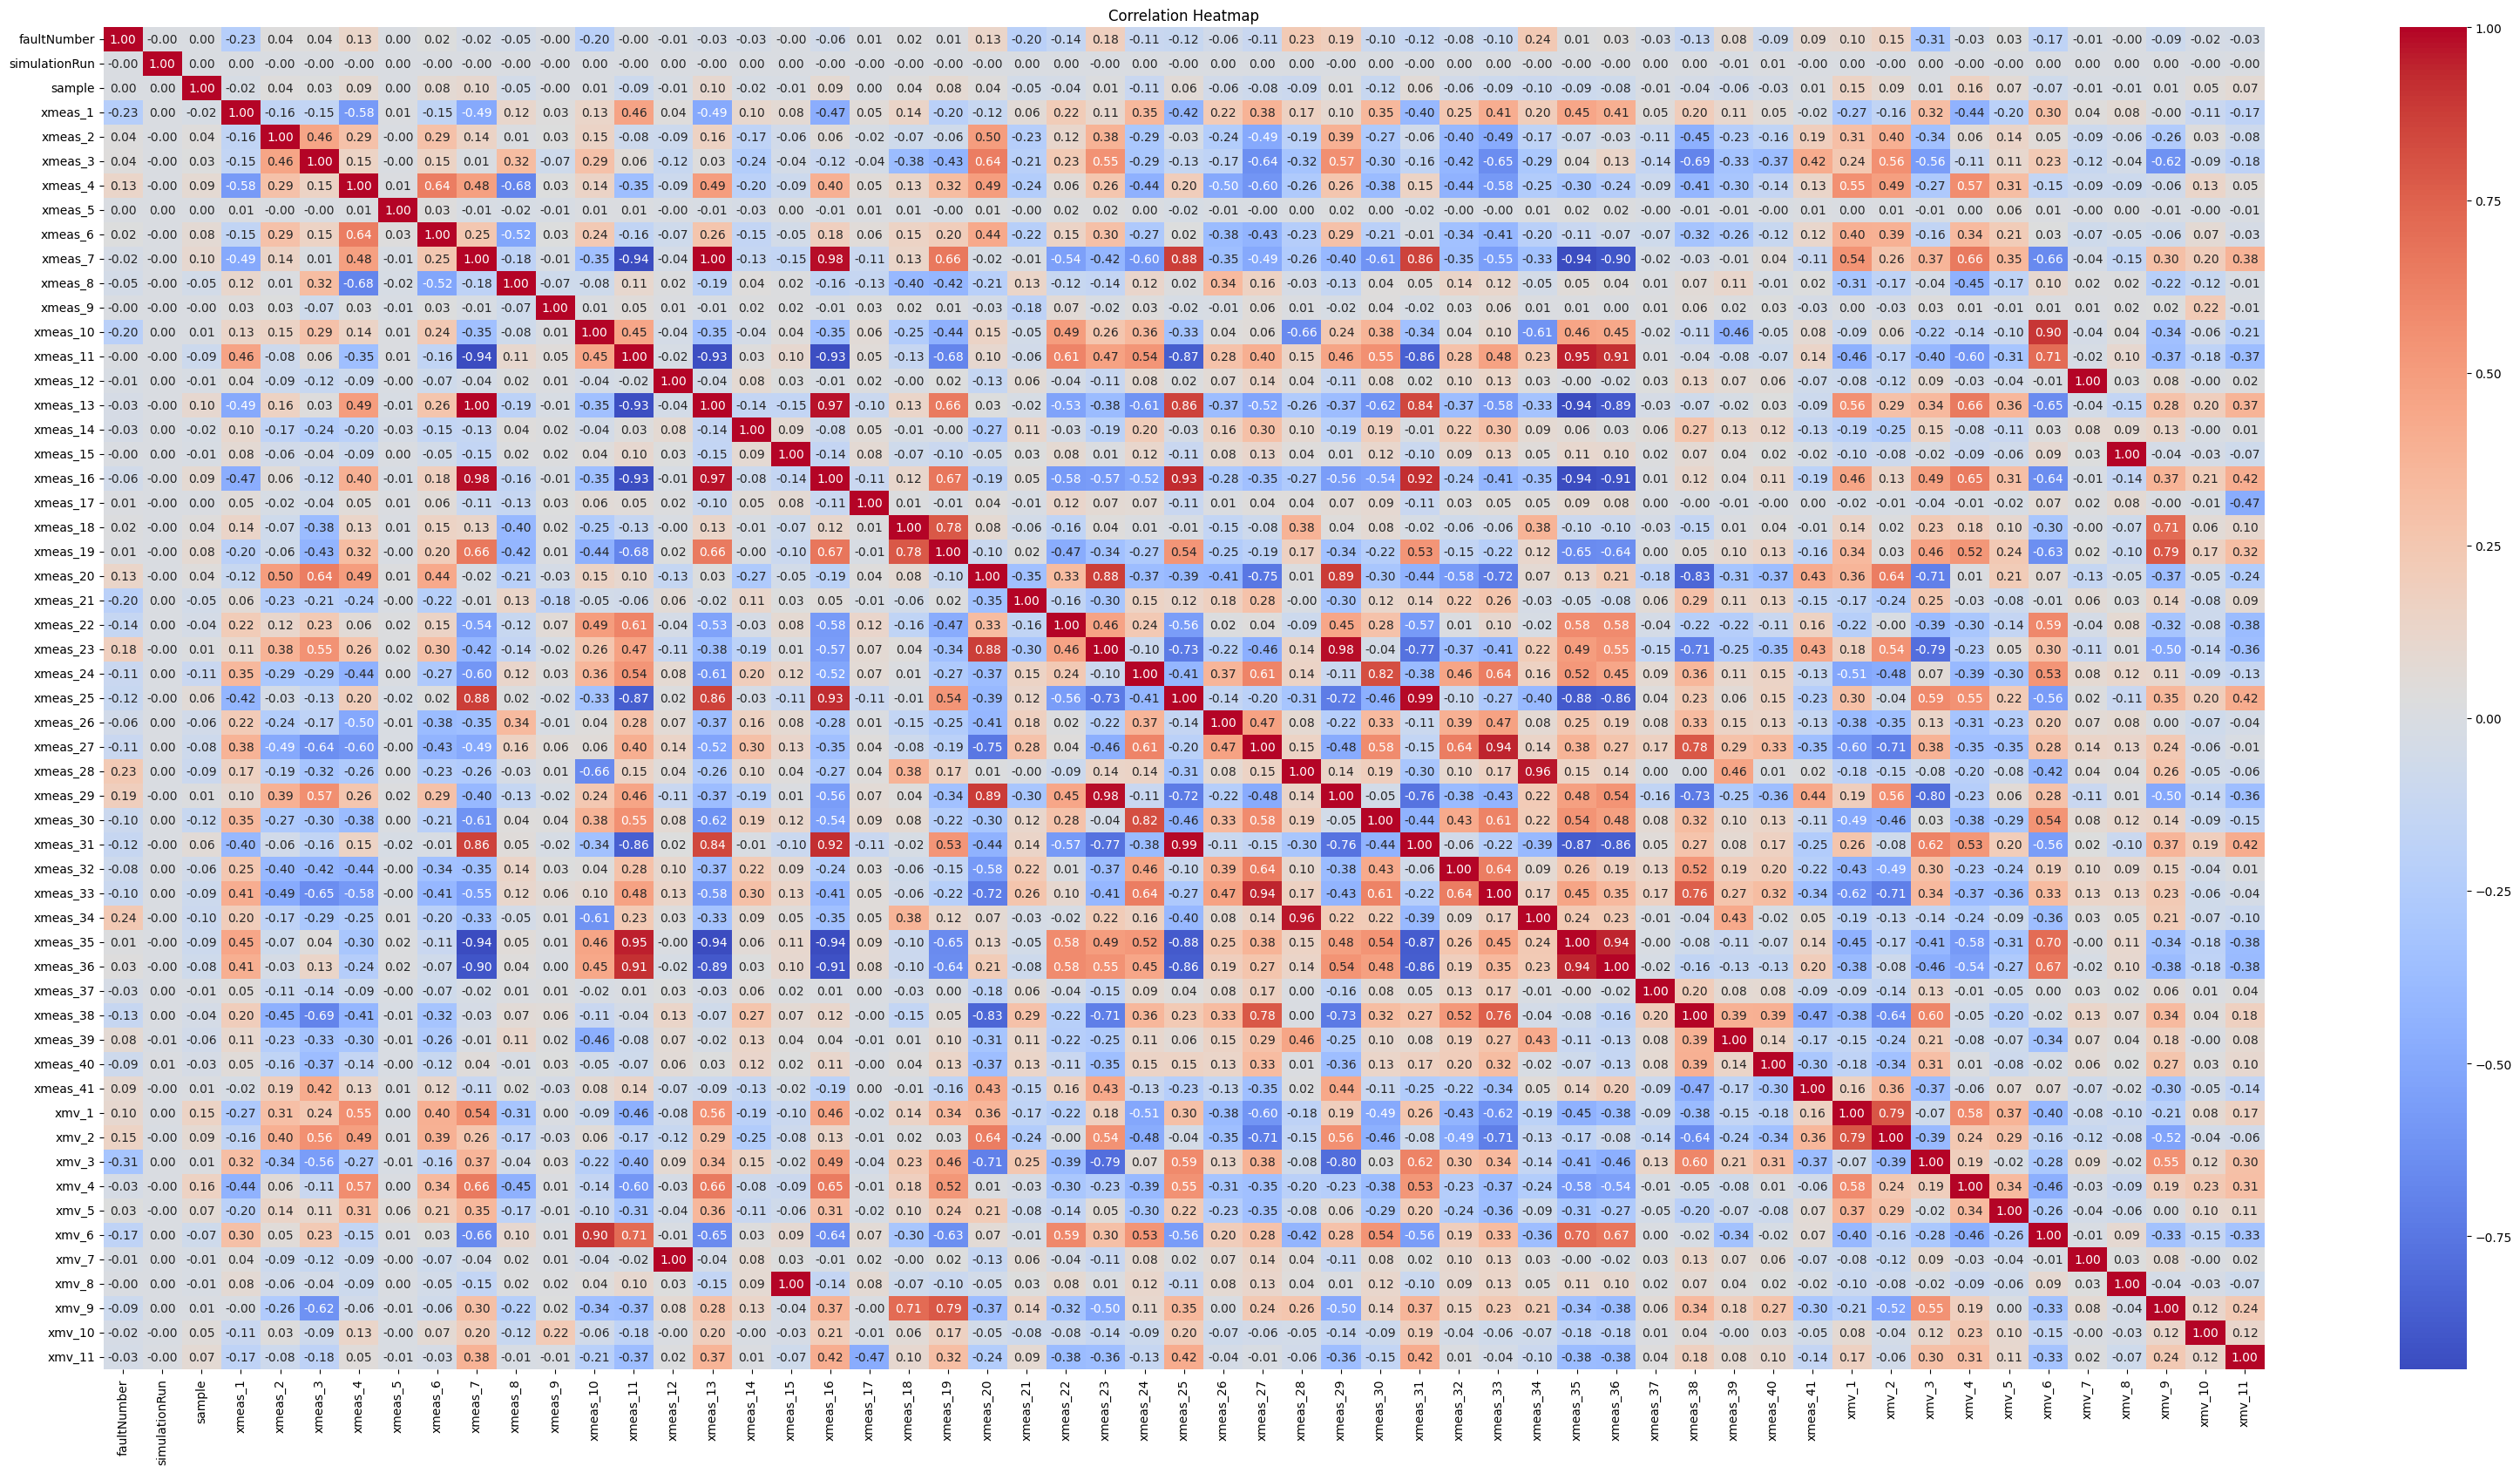

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlation_matrix = df_training.corr()

# Create heatmap
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

# drop columns
drop_column_indexes = [25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,48,52];
df_training.drop(df_training.columns[drop_column_indexes], axis=1, inplace=True)
df_training

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmeas_22,xmv_1,xmv_2,xmv_3,xmv_4,xmv_6,xmv_7,xmv_8,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,77.047,62.881,53.744,24.657,62.544,39.935,42.323,47.757,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,77.434,63.132,53.414,24.588,59.259,40.176,38.554,43.692,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,77.466,63.117,54.357,24.666,61.275,40.244,38.990,46.699,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,77.443,63.100,53.946,24.725,59.856,40.257,38.072,47.541,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,76.947,63.313,53.658,28.797,60.717,39.144,41.955,47.645,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249995,20.0,500.0,496,0.23419,3655.3,4461.7,9.3448,27.008,42.481,2703.0,...,77.091,63.020,53.670,23.350,61.061,40.999,38.653,47.386,40.212,17.659
5249996,20.0,500.0,497,0.26704,3647.4,4540.2,9.3546,27.034,42.671,2704.7,...,77.421,62.829,54.650,26.362,60.020,41.579,33.624,47.536,41.199,18.741
5249997,20.0,500.0,498,0.26543,3630.3,4571.6,9.4089,27.129,42.470,2705.1,...,77.141,63.124,54.274,26.521,59.824,41.505,40.967,52.437,41.302,23.199
5249998,20.0,500.0,499,0.27671,3655.7,4498.9,9.3781,27.353,42.281,2705.8,...,77.169,62.610,53.506,26.781,62.818,40.208,40.957,47.628,40.510,15.932


In [8]:
# apply scaler
unscaled_columns = ['faultNumber', 'simulationRun', 'sample']
features = df_training.columns[~df_training.columns.isin(unscaled_columns)]
scalar = StandardScaler()
df_training[features] = scalar.fit_transform(df_training[features])
df_training

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmeas_22,xmv_1,xmv_2,xmv_3,xmv_4,xmv_6,xmv_7,xmv_8,xmv_10,xmv_11
0,0.0,1.0,1,-0.071597,0.238973,0.209956,-0.385118,-0.054480,0.124723,-0.240303,...,0.003785,-0.186895,-0.108549,-0.274413,-0.084469,0.000453,1.440414,0.557610,-0.066534,-0.071526
1,0.0,1.0,2,-0.066737,-0.102327,0.463866,0.160407,-0.781540,0.680154,-0.230879,...,0.282785,-0.110125,-0.172840,-0.277856,-0.538277,0.019540,0.162749,-1.166150,-0.056199,-0.318940
2,0.0,1.0,3,-0.071597,-0.081288,-0.261066,0.205868,-0.115069,-0.935066,-0.214724,...,0.305855,-0.114713,0.010876,-0.273963,-0.259776,0.024926,0.310550,0.108966,-0.072570,0.339778
3,0.0,1.0,4,-0.075772,-0.057912,0.054482,0.304085,-0.621414,-0.957411,-0.201261,...,0.289273,-0.119912,-0.069195,-0.271019,-0.455804,0.025956,-0.000645,0.466015,-0.027141,-0.142216
4,0.0,1.0,5,0.227291,0.355856,-0.084433,-0.087380,-0.054480,0.916372,-0.229533,...,-0.068308,-0.054765,-0.125304,-0.067815,-0.336861,-0.062194,1.315665,0.510116,-0.041056,-0.068761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249995,20.0,500.0,496,-0.182405,-0.198172,-0.409181,-0.068579,0.460520,0.376901,-0.257804,...,0.035506,-0.144381,-0.122966,-0.339635,-0.289339,0.084722,0.196310,0.400288,-0.173560,-0.227122
5249996,20.0,500.0,497,0.042428,-0.382848,0.312992,-0.041078,0.573041,0.983407,-0.234918,...,0.273413,-0.202799,0.067959,-0.189328,-0.433148,0.130658,-1.508487,0.463895,-0.072570,-0.013473
5249997,20.0,500.0,498,0.031409,-0.782590,0.601861,0.111299,0.984176,0.341788,-0.229533,...,0.071552,-0.112572,-0.005294,-0.181394,-0.460225,0.124797,0.980740,2.542160,-0.062032,0.866791
5249998,20.0,500.0,499,0.108612,-0.188821,-0.066954,0.024868,1.953589,-0.261526,-0.220109,...,0.091738,-0.269782,-0.154917,-0.168419,-0.046618,0.022075,0.977350,0.502908,-0.143068,-0.568131


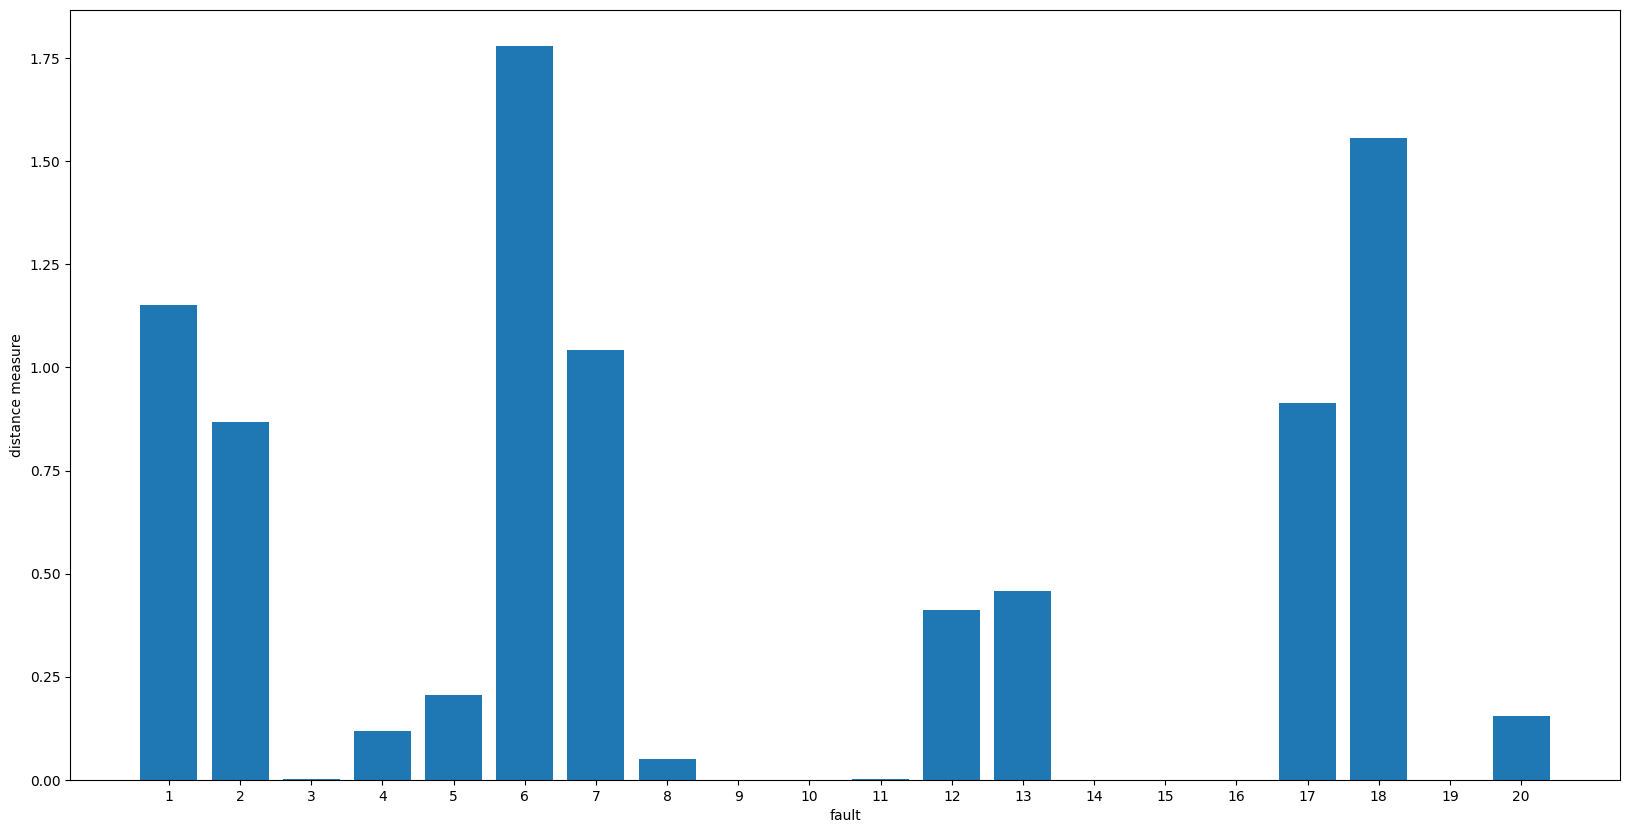

In [9]:
# calculate the feature means for each fault
df_means = df_training[['faultNumber', *features]].groupby('faultNumber').mean()
fault_free_means = df_means.loc[0, :]
faulty_means = df_means.loc[df_means.index > 0, :]

# calculate distance between each fault and fault-free centroids
distances = pairwise_distances(faulty_means, [fault_free_means], metric='cosine')
distance_values = [d[0] for d in distances]

# display distances
plt.figure(figsize=(20, 10))
plt.bar(range(1,21), distance_values)
plt.xlabel('fault')
plt.ylabel('distance measure')
plt.xticks(range(1,21))
plt.show()

In [10]:
# remove faults that are indistinguishable from normal data
remove_faults = [3, 9, 10, 11, 14, 15, 16, 19]
remove_indeces = df_training[df_training['faultNumber'].isin(remove_faults)].index
df_training.drop(remove_indeces, inplace=True)
df_training

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmeas_22,xmv_1,xmv_2,xmv_3,xmv_4,xmv_6,xmv_7,xmv_8,xmv_10,xmv_11
0,0.0,1.0,1,-0.071597,0.238973,0.209956,-0.385118,-0.054480,0.124723,-0.240303,...,0.003785,-0.186895,-0.108549,-0.274413,-0.084469,0.000453,1.440414,0.557610,-0.066534,-0.071526
1,0.0,1.0,2,-0.066737,-0.102327,0.463866,0.160407,-0.781540,0.680154,-0.230879,...,0.282785,-0.110125,-0.172840,-0.277856,-0.538277,0.019540,0.162749,-1.166150,-0.056199,-0.318940
2,0.0,1.0,3,-0.071597,-0.081288,-0.261066,0.205868,-0.115069,-0.935066,-0.214724,...,0.305855,-0.114713,0.010876,-0.273963,-0.259776,0.024926,0.310550,0.108966,-0.072570,0.339778
3,0.0,1.0,4,-0.075772,-0.057912,0.054482,0.304085,-0.621414,-0.957411,-0.201261,...,0.289273,-0.119912,-0.069195,-0.271019,-0.455804,0.025956,-0.000645,0.466015,-0.027141,-0.142216
4,0.0,1.0,5,0.227291,0.355856,-0.084433,-0.087380,-0.054480,0.916372,-0.229533,...,-0.068308,-0.054765,-0.125304,-0.067815,-0.336861,-0.062194,1.315665,0.510116,-0.041056,-0.068761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249995,20.0,500.0,496,-0.182405,-0.198172,-0.409181,-0.068579,0.460520,0.376901,-0.257804,...,0.035506,-0.144381,-0.122966,-0.339635,-0.289339,0.084722,0.196310,0.400288,-0.173560,-0.227122
5249996,20.0,500.0,497,0.042428,-0.382848,0.312992,-0.041078,0.573041,0.983407,-0.234918,...,0.273413,-0.202799,0.067959,-0.189328,-0.433148,0.130658,-1.508487,0.463895,-0.072570,-0.013473
5249997,20.0,500.0,498,0.031409,-0.782590,0.601861,0.111299,0.984176,0.341788,-0.229533,...,0.071552,-0.112572,-0.005294,-0.181394,-0.460225,0.124797,0.980740,2.542160,-0.062032,0.866791
5249998,20.0,500.0,499,0.108612,-0.188821,-0.066954,0.024868,1.953589,-0.261526,-0.220109,...,0.091738,-0.269782,-0.154917,-0.168419,-0.046618,0.022075,0.977350,0.502908,-0.143068,-0.568131


In [11]:
# reduce training size by limiting number of simulations
limit_simulations = 100
remove_indeces = df_training[df_training['simulationRun'] > limit_simulations].index
df_training.drop(remove_indeces, inplace=True)

In [12]:
# add lag features
def add_lag_features(df):
    feat_lags = {
        f'{feat}_lag_{i}': df[feat].shift(i) 
        for i in range(1, lag + 1)
        for feat in features 
    }
    return pd.DataFrame.from_dict(feat_lags)

# set the shift amount
lag = 5

# group by fault and simulation
df_grouped = df_training.groupby(['faultNumber','simulationRun'], as_index=False)

# calculate the lags for each group
df_lags = df_grouped.apply(add_lag_features, include_groups=False)

# reset the index
orig_index = pd.Series([idx[1] for idx in df_lags.index])
df_lags.set_index(orig_index, inplace=True)

# add the lags back into the dataset
df_training = pd.concat([df_training, df_lags], axis=1)
df_training

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmeas_22_lag_5,xmv_1_lag_5,xmv_2_lag_5,xmv_3_lag_5,xmv_4_lag_5,xmv_6_lag_5,xmv_7_lag_5,xmv_8_lag_5,xmv_10_lag_5,xmv_11_lag_5
0,0.0,1.0,1,-0.071597,0.238973,0.209956,-0.385118,-0.054480,0.124723,-0.240303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,2,-0.066737,-0.102327,0.463866,0.160407,-0.781540,0.680154,-0.230879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,1.0,3,-0.071597,-0.081288,-0.261066,0.205868,-0.115069,-0.935066,-0.214724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,1.0,4,-0.075772,-0.057912,0.054482,0.304085,-0.621414,-0.957411,-0.201261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,5,0.227291,0.355856,-0.084433,-0.087380,-0.054480,0.916372,-0.229533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249995,20.0,100.0,496,-0.260566,1.576121,0.121639,0.040863,0.075352,-0.188106,-0.162219,...,0.243134,0.114679,-0.168749,-0.167870,-0.218194,0.105710,0.068170,-1.943008,-0.080347,-0.150114
1249996,20.0,100.0,497,-0.414493,-2.400259,-0.643772,-0.514765,-0.933011,0.475857,-0.147410,...,-0.311983,0.055649,-0.184140,-0.165225,-0.458567,0.111096,0.748190,-0.906632,-0.014556,-0.123260
1249997,20.0,100.0,498,-0.439337,-1.554022,-0.111112,0.146938,0.737495,-0.459438,-0.105676,...,-0.226913,-0.062106,-0.089457,-0.313486,-0.005036,-0.003507,0.228514,-0.008920,-0.089249,0.244603
1249998,20.0,100.0,499,-0.335442,-1.904673,-0.063274,0.146938,-0.772885,1.593104,-0.080097,...,-0.278820,-0.078928,-0.087314,-0.319076,-0.496419,-0.029564,0.092239,1.940858,-0.119330,-0.184076


In [13]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

features_with_lag = df_training.columns[~df_training.columns.isin(unscaled_columns)]

X = df_training[features_with_lag]
y = df_training['faultNumber']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# # Convert the datasets to DMatrix, which is a data structure used by XGBoost for optimization
dtrain = xgb.DMatrix(X, label=y_encoded)

# # Set the parameters for the XGBoost model
params = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'multi:softprob',  # Use softmax for multi-class classification
    'num_class': 13  # Number of unique classes in the target variable
}

# # Train the XGBoost model
num_rounds = 50
xgb_model = xgb.train(params, dtrain, num_rounds)

In [14]:
# modify the test data the same as training data to feed it into the model

# remove features
df_testing.drop(df_testing.columns[drop_column_indexes], axis=1, inplace=True)

# scale the remaining features
df_testing[features] = scalar.fit_transform(df_testing[features])

# remove test data for the ignored faults
remove_indeces_test = df_testing[df_testing['faultNumber'].isin(remove_faults)].index
df_testing.drop(remove_indeces_test, inplace=True)

# limit number of simulations
remove_indeces_test = df_testing[df_testing['simulationRun'] > limit_simulations].index
df_testing.drop(remove_indeces_test, inplace=True)

# calculate the lags
df_grouped_test = df_testing.groupby(['faultNumber','simulationRun'], as_index=False)
df_lags_test = df_grouped_test.apply(add_lag_features, include_groups=False)
orig_index_test = pd.Series([idx[1] for idx in df_lags_test.index])
df_lags_test.set_index(orig_index_test, inplace=True)
df_testing = pd.concat([df_testing, df_lags_test], axis=1)

In [15]:
from sklearn.metrics import accuracy_score

features_with_lag_test = df_testing.columns[~df_testing.columns.isin(unscaled_columns)]

X_test = df_testing[features_with_lag_test]
y_test = df_testing['faultNumber']

y_encoded_test = label_encoder.fit_transform(y_test)

# Convert the datasets to DMatrix, which is a data structure used by XGBoost for optimization
dtest = xgb.DMatrix(X_test, label=y_encoded_test)

preds = xgb_model.predict(dtest)
predictions = preds.argmax(axis=1)  # Get the class with the highest probability

In [22]:
# Evaluate the model
pred_decoded = label_encoder.inverse_transform(predictions)
accuracy = accuracy_score(y_test, pred_decoded)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


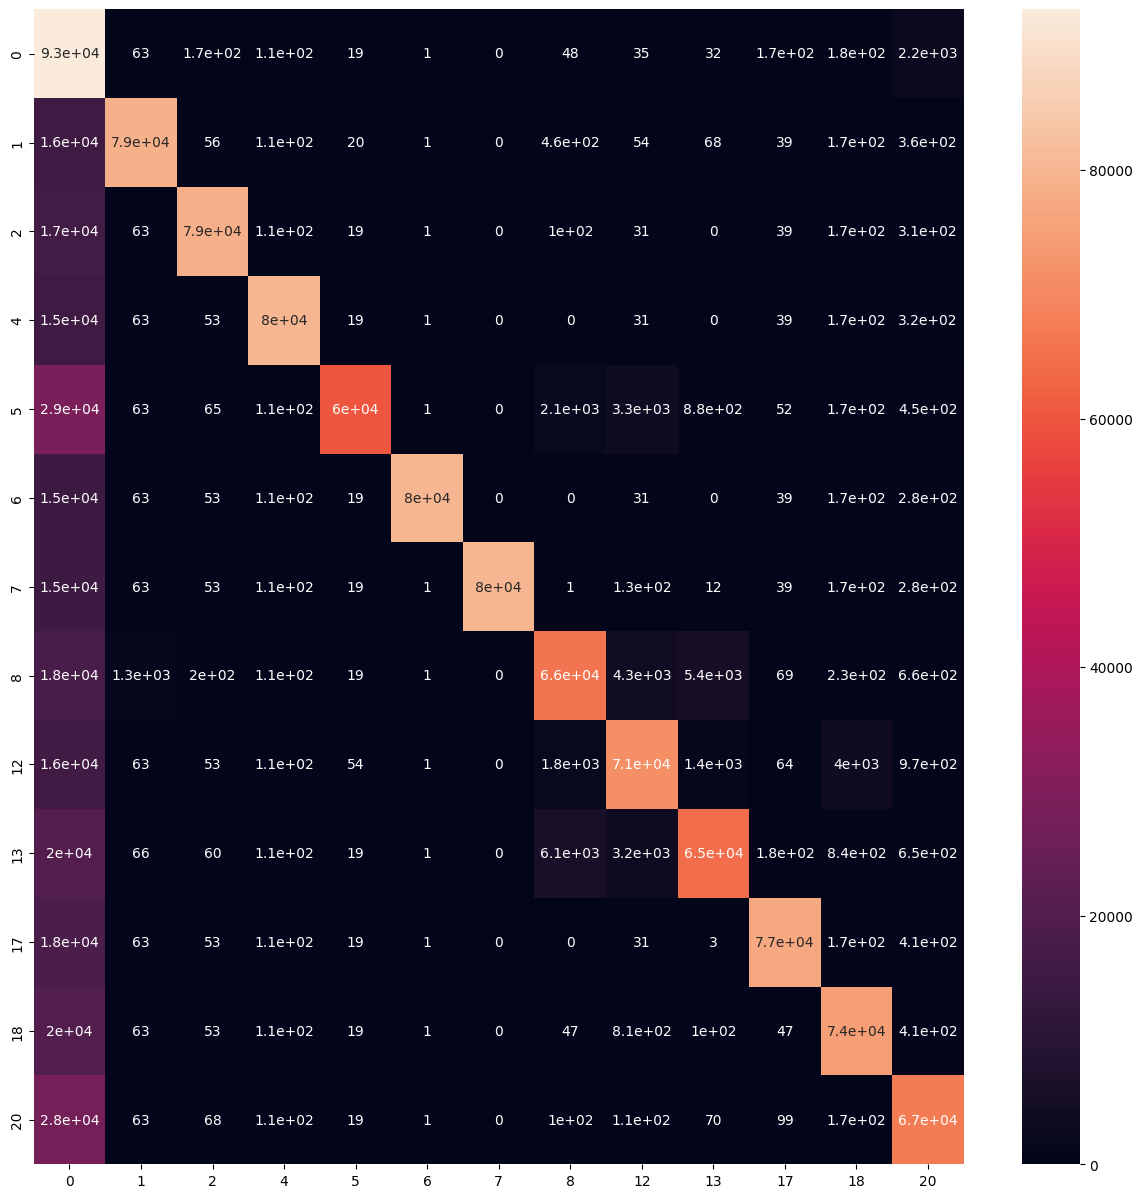

In [48]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred_decoded)

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cf_matrix, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.show()

In [75]:
from sklearn.metrics import f1_score, precision_score, recall_score

metrics = {
    'f1_score': f1_score(y_test, pred_decoded, average=None), 
    'precision': precision_score(y_test, pred_decoded, average=None),
    'recall': recall_score(y_test, pred_decoded, average=None),
    'accuracy': [cf_matrix[i][i]/sum(cf_matrix[i]) for i in range(13)]
}

pd.DataFrame(metrics, index=label_encoder.classes_)

,f1_score,precision,recall,accuracy
0,0.446791,0.290408,0.968125,0.968125
1,0.893295,0.975870,0.823604,0.823604
2,0.895730,0.988248,0.819052,0.819052
4,0.902387,0.983484,0.833646,0.833646
5,0.768144,0.995621,0.625281,0.625281
6,0.909035,0.999850,0.833344,0.833344
7,0.908328,1.000000,0.832052,0.832052
8,0.763212,0.859534,0.686302,0.686302
12,0.795080,0.855398,0.742708,0.742708
13,0.766260,0.889435,0.673052,0.673052
